In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## Load Dataset
---

This notebook uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. The training set consists of 60,000 images to train the network and 10,000 test set images to evaluate how accurately the network learned to classify images.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

| Label |    Class    |
|-------|-------------|
|   0   | T-shirt/top |
|   1   |   Trouser   |
|   2   |   Pullover  |
|   3   |	 Dress    |
|   4   |    Coat     |
|   5   |    Sandal   |
|   6   |    Shirt    |
|   7   |   Sneaker   |
|   8   |     Bag     |
|   9   |  Ankle boot |

In [3]:
# Loading train and test datasets

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 15s 3us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
- - -

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

## Preprocess the data
---

The pixel value of the first image in the training set falls in the range of 0 to 255:

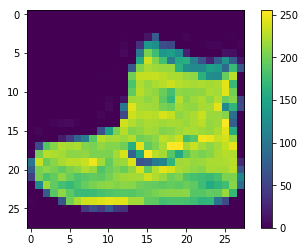

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The values are scaled to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255 for both the training set and the test set.

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

First 25 images from the training set, the data seems to be in correct format.

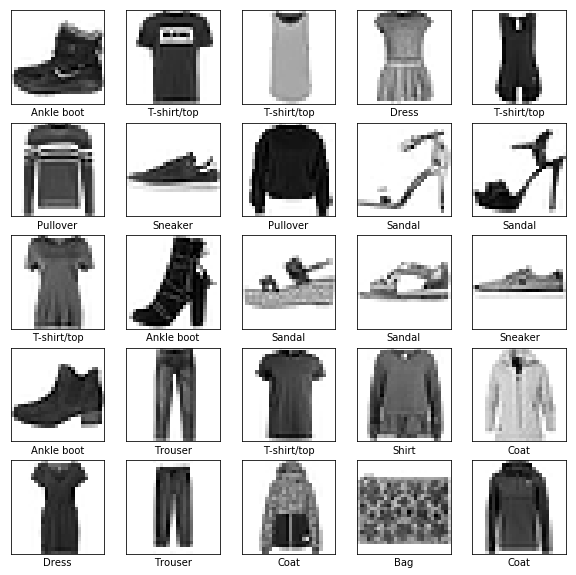

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Build
---

### 1) Layer Setup

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0718 19:17:59.481819 140170261505856 deprecation.py:506] From /home/dotslash21/anaconda3/envs/work/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 2) Model Compilation

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3) Model Training

In [22]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4946 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3700 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3332 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3091 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2917 - acc: 0.8921


## Accuracy Evaluation
---

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3398 - acc: 0.8780
Test accuracy: 0.878


## Prediction
---

In [25]:
predictions = model.predict(test_images)

Inspecting the first prediction

In [26]:
predictions[0]

array([3.1489603e-06, 4.5576214e-09, 1.2060560e-06, 5.7100050e-07,
       5.1688844e-06, 5.9989266e-02, 2.1073978e-05, 7.3007546e-02,
       2.3930910e-04, 8.6673266e-01], dtype=float32)

### Visualizing the prediction
---

Check the label which has highest confidence.

In [28]:
np.argmax(predictions[0])

9

The first prediction seems to be correct.

In [30]:
test_labels[0]

9

We graph the full set of 10 class predictions.

In [33]:
# Required functions to plot the graph

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Plotting several images with predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label.

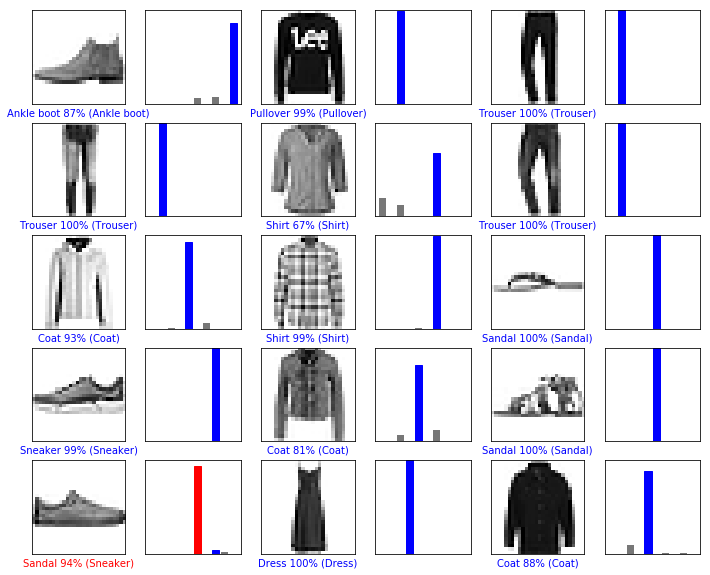

In [34]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

We see that out of the 15 images the model correctly classified 14 images correctly and 1 image wrong.

# Licence Information
---

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 Arunangshu Biswas
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.